**Import required libraries**

In [1]:
import intake
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import datetime
import numpy as np
import xarray as xr

**Open the NWM intake catalog**

In [2]:
catalog = intake.open_catalog('s3://nextgen-dmac-cloud-ingest/nwm_ll/nwm_intake.yml',storage_options={'anon':True})
(list(catalog))

['NWM_Best_CONUS_Short_Range',
 'NWM_Best_CONUS_Medium_Range',
 'NWM_Best_Alaska_Short_Range',
 'NWM_Best_Alaska_Medium_Range',
 'NWM_Best_Hawaii_Short_Range',
 'NWM_Best_PuertoRico_Short_Range']

### Compare NWM souce dataset with Kerchunked virtual aggregate dataset

Part of the processing included adding additional coordinate and attribute values to the souce netCDF files produced by NWM.  Below is a list of the additions.

**Coordinates** added to the kerchunked datasets include: 
* latitude
* longitude

**Attributes** added include:
* altitude: altitude of node 
* link_id: the link id of the node
* from_link_id: the from_link_id of the node in the network topology
* to_link_id: the to_link_id of the node in the network topology
* terminal_node: whether this node is a terminal node or not


**Time Dimension**

Other changes include to the length of the `time` dimension in the dataset, showing the virtual aggregation of many forecast times in a single 'best time series' dataset.

**Compare the short range channel forecast netCDF file with kerchunked equivalent**

The xarray representation below shows the structure of the original/source datasets output by NWM.  

In [3]:
ds_sr_nc = xr.open_dataset("files/nwm.t23z.short_range.channel_rt.f001.conus.nc")
ds_sr_nc

<xarray.Dataset> Size: 155MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776734)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-02-14
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-13T23:00:00
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 22MB ...
    nudge           (feature_id) float64 22MB ...
    velocity        (feature_id) float64 22MB ...
    qSfcLatRunoff   (feature_id) float64 22MB ...
    qBucket         (feature_id) float64 22MB ...
    qBtmVertRunoff  (feature_id) float64 22MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-02-13_23:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-02-14_00:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

**Open the equivalent 'NWM_Best_CONUS_Short_Range' dataset** 

Open the kerchunked virtual dataset from the Intake catalog to illustrate the added attribution.

In [4]:
cat = catalog['NWM_Best_CONUS_Short_Range']
ds_sr = cat.to_dask()
ds_sr

<xarray.Dataset> Size: 92GB
Dimensions:         (feature_id: 2776734, time: 689, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T18:00:00
  * time            (time) datetime64[ns] 6kB 2024-03-25T19:00:00 ... 2024-04...
Data variables:
    altitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    link_id         (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    nudge           (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBucket         (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    streamflow      (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    terminal_node   (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    to_link_id      (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    velocity        (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_19:00:00
    model_total_valid_times:    18
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1


### Select the catalog entry to open for plotting


&nbsp;
Open the 'NWM_Best_Alaska_Medium_Range' Intake entry, and return an Xarray dataset, similar to Short Range above:

In [5]:
cat = catalog['NWM_Best_Alaska_Medium_Range']
ds = cat.to_dask()
ds

<xarray.Dataset> Size: 17GB
Dimensions:         (feature_id: 391528, time: 907, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
    latitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T12:00:00
  * time            (time) datetime64[ns] 7kB 2024-03-25T18:00:00 ... 2024-05...
Data variables:
    altitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object 7kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_18:00:00
    model_total_valid_times:    240
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1


&nbsp;

**Set the set the feature ID and time bounds to extract**

Use a two week time window (-7 days to +7 days from present) to plot streamflow.

In [6]:
feature_id = 19020190088835

# create a time window of +-1 week
start_t = datetime.datetime.now() - datetime.timedelta(days=7)
end_t = datetime.datetime.now() + datetime.timedelta(days=7)


&nbsp;

**Extract the data for the time slice and feature ID**

In [7]:

ts_ds = ds.sel(time=slice(start_t, end_t),feature_id=feature_id)
ts_ds


<xarray.Dataset> Size: 22kB
Dimensions:         (time: 336, reference_time: 1)
Coordinates:
    feature_id      int64 8B 19020190088835
    latitude        float32 4B dask.array<chunksize=(), meta=np.ndarray>
    longitude       float32 4B dask.array<chunksize=(), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-25T12:00:00
  * time            (time) datetime64[ns] 3kB 2024-04-15T15:00:00 ... 2024-04...
Data variables:
    altitude        float32 4B dask.array<chunksize=(), meta=np.ndarray>
    crs             (time) object 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    float64 8B dask.array<chunksize=(), meta=np.ndarray>
    link_id         float64 8B dask.array<chunksize=(), meta=np.ndarray>
    nudge           (time) float64 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    qBtmVertRunoff  (time) float64 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    qBucket         (time) float64 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    qSfcLatRunoff   (time) float64 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    streamflow      (time) float64 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    terminal_node   float64 8B dask.array<chunksize=(), meta=np.ndarray>
    to_link_id      float64 8B dask.array<chunksize=(), meta=np.ndarray>
    velocity        (time) float64 3kB dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-03-25_18:00:00
    model_total_valid_times:    240
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1

&nbsp;


**Plot the timeseries data**

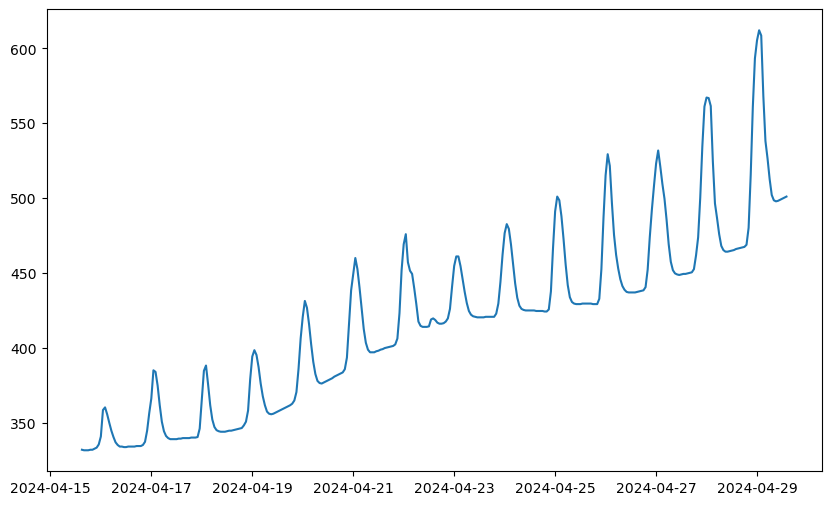

In [8]:
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:]*35.3147)

plt.show()